# Nezávislost na integrační cestě

V učebnicích často najdete příklady na výpočet křivkového integrálu pomocí potenciálu, protože toto je jednodušší v ručně vypočítatelných příkladech. Pro numerickou integraci je často situace přesně opačná. Křivkový integrál je relativně snadné vypočítat robustními metodami a jeho výpočet vede k jedné z cest, jak potenciál určit. 

Zkusíme si problematiku ilustrovat na příkladu dvou vektorových polí a dvou integračních cest v každém z nich. 
* První pole bude nevírové, bude v něm existovat skalární potenciál a integrace po obou cestách (zvolíme přímku a kubickou parabolu) dá stejný výsledek. Kterákoliv z těchto "cest" vede ke stejné skalární funkci, která ekvivalentním způsobem charakterizuje vektorové pole a je skalárním potenciálem tohoto pole. 
* Druhé vektorové pole bude vírové, nebude v něm existovat skalární potenciál a poznáme to podle toho, že pokud se budeme snažit jej hledat, tak skalární funkce, která by mohla jeho roli hrát, bude vycházet jinak pro přímky a jinak pro kubické funkce. 

## Vektorové pole se skalárním potenciálem

Budeme si demonstrovat závislost či nezávislost na integrační cestě. Budeme pro zadané vektorové pole $$\vec F=(6x^2y+x+y)\vec i + (2x^3+x)\vec j$$ počítat křivkový integrál po dvou různých křivkách, po přímce a po kubické parabole. Křivky budou vycháztet z počátku a koncový bod bude parametrizován, abychom jím mohli pohybovat v rovině. Budeme tak moci vypočítat křivkový integrál z počátku do libovolného bodu roviny. 

Ve cvičení [bylo ukázáno](http://user.mendelu.cz/marik/am/slidy/cviceni/cviceni07.md.html#kmenov%C3%A1-funkce-pomoc%C3%AD-k%C5%99ivkov%C3%A9ho-integr%C3%A1lu), že k tomuto vektorovému poli existuje kmenová funkce $$ \varphi (x,y)=2x^3y+\frac 12 x^2+xy+C.$$ Nyní si tento proces vyzkoušíme numericky. Protože budeme integrovat z počátku, očekáváme, že výsledkem bude potenciál, který je v počátku roven nule, tj. funkce 
$$ \varphi (x,y)=2x^3y+\frac 12 x^2+xy.$$

In [20]:
import numpy                     # knihovna na numerické výpočty (goniomerické funkce, gradient, 2D mřížka a dělení intervalu, ...)
import scipy.integrate           # knihovna na technické výpočty (integrál)
import matplotlib.pyplot as plt  # knihovna na kreslení

In [21]:
x = numpy.linspace (0,4,21)      # diskretizace intervalu pro x
y = numpy.linspace (0,4,21)      # diskretizace intervalu pro y
Y, X = numpy.meshgrid(x, y)      # mřížka v rovině z bodů, do kterých budeme počítat křivkový integrál
PotencialPrimka = numpy.zeros((x.shape[0],y.shape[0]))    # naplnění pole pro výsledky integrace po přímkách nulami
PotencialParabola = numpy.zeros((x.shape[0],y.shape[0]))  # naplnění pole pro výsledky integrace po kubických parabolách nulami

Zkusíme dvě integrační cesty z bodu $(0,0)$ do bodu $(x,y)$. Přímku $$\vec r(t)=xt\vec i + yt\vec j, \quad t\in[0,1] $$ a kubickou parabolu $$\vec r(t)=xt\vec i + yt^3\vec j, \quad t\in[0,1].$$  Křivkové integrály přetransformujeme na Riemannovy
$$\int_0^1 P(xt,yt)x+Q(xt,yt)y\, \mathrm dt $$
pro integrál po přímce a
$$\int_0^1 P(xt,yt^3)x+Q(xt,yt^3)y3t^2\, \mathrm dt $$
pro integrál po parabole a numerickou integrací tyto integrály vypočteme. 

In [23]:
def KrivkovyIntegralPrimka(P, Q, a,b):                  # Definice procedury pro vypocet integralu po přímce
    t = numpy.linspace(0,1,100)                         # Nastavíme interval pro diskretizaci integrálu
    integrand = P(a*t,b*t)*a+Q(a*t,b*t)*b               # Vypočteme skalární součin vektorového pole a tečného vektoru k přímce
    return(scipy.integrate.simps(integrand,t))          # Vypočteme integrál a vrátíme jako výstup funkce

def KrivkovyIntegralParabola(P, Q, a,b):                # Definice procedury pro vypocet integralu po přímce
    t = numpy.linspace(0,1,100)                         # Nastavíme interval pro diskretizaci integrálu  
    integrand = P(a*t,b*t**3)*a+Q(a*t,b*t**3)*3*b*t**2  # Vypočteme skalární součin vektorového pole a tečného vektoru ke kubické parabole
    return(scipy.integrate.simps(integrand,t))          # Vypočteme integrál a vrátíme jako výstup funkce


Nadefinujeme komponenty vektorového pole a vypočteme křivkové inetrgály do jednotlivých bodů v rovině. Ve dvojitém cyklu tedy nakonec počítáme obrovské množství intergrálů, ale ani tak to moc dlouho netrvá.

In [24]:
def P(x,y):    # definice komponent vektorového pole
    return (6*x**2*y+x+y)
    
def Q(x,y):
    return (2*x**3+x)

for i in range(x.shape[0]):            # Vyplníme pole s hodnotami potenciálu příslušnými hodnotami v cyklu přes první a druhou proměnnou
    for j in range(y.shape[0]):
        PotencialPrimka[i][j] = KrivkovyIntegralPrimka(P, Q, x[i], y[j])      # Výpočet a uložení integálu po přímce
        PotencialParabola[i][j] = KrivkovyIntegralParabola(P, Q, x[i], y[j])  # Výpočet a uložení integálu po kubické parabole

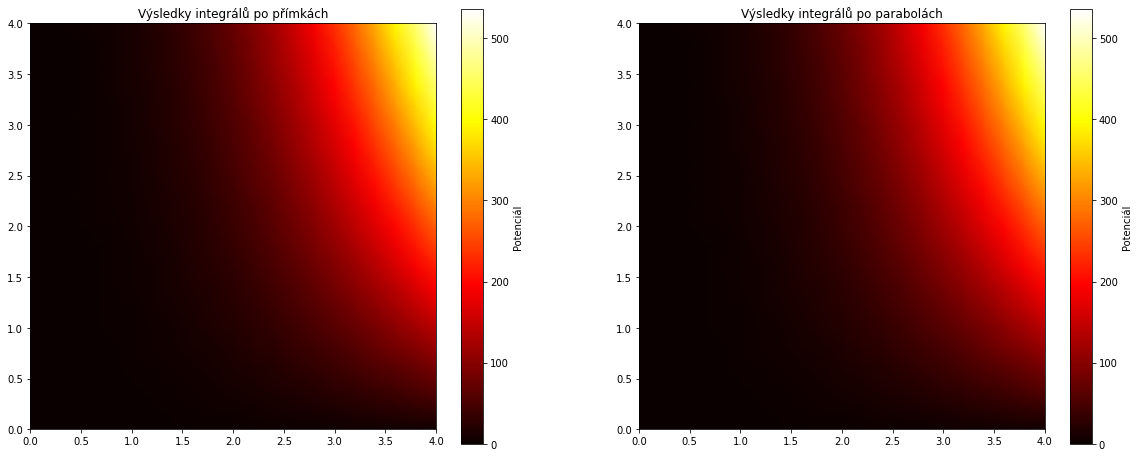

In [25]:
fig, axes = plt.subplots(1,2, figsize=(20,8))  # inicializace grafiky

ax = axes[0]                                   # začneme kreslit do prvního grafu
cmap = plt.get_cmap('hot')                     # nastaveni schema pro barevnou mapu
output = ax.pcolormesh(X, Y, PotencialPrimka, cmap=cmap, shading='gouraud') # vykresleni barevne mapy pomocí zvolené barevné mapy a vyhlazování přechodů
plt.colorbar(output, ax=ax, label="Potenciál") # barevný sloupec s hodnotami vedle grafu
ax.set_aspect(1)                               # stejné měřítko na osách, aby se kružnice nedeformovaly
ax.set_title("Výsledky integrálů po přímkách") # nadpis grafu

ax = axes[1]                                   # začneme kreslit do prvního grafu
output = ax.pcolormesh(X, Y, PotencialParabola, cmap=cmap, shading='gouraud') # vykresleni barevne mapy pomocí zvolené barevné mapy a vyhlazování přechodů
plt.colorbar(output, ax=ax, label="Potenciál") # barevný sloupec s hodnotami vedle grafu
ax.set_aspect(1)                               # stejné měřítko na osách, aby se kružnice nedeformovaly
ax.set_title("Výsledky integrálů po parabolách") # nadpis grafu
None

Vidíme, že obrázky vypadají přibližně stejně. To je dobré znamení, ale přesvědšivější bude zjistit, o kolik se výsledky liší numericky. Najdeme maximum  a průměr absolutní hodnoty rozdílu. Po výpočtu vidíme, že ve srovnání s funkčními hodnotami je tento rozdíl zanedbatelný. Je připsatelný na vrub tomu, že neintegrujeme symbolicky a přesně, ale numericky na mřížce s konečně velkým krokem.

In [26]:
numpy.amax(abs(PotencialPrimka-PotencialParabola))   # Maximum absolutní hodnoty rozdílu

0.0020979988173621678

In [27]:
numpy.average(abs(PotencialPrimka-PotencialParabola))

0.0002773205040675051

## Vektorové pole bez skalárního potenciálu

Pokusíme se provést totéž co výše pro vektorové pole $$ \vec F=x\vec i+(y-x^2)\vec j,$$ tj. komponenty vektorového pole budou $$ P(x,y)=x $$ a $$ Q(x,y)=y-x^2.$$
Najdeme křivkové integrály z počátku do bodu $(x,y)$ a znázorníme výsledné hodnoty graficky v rovině, tedy $$ \begin{aligned}\frac{\partial P}{\partial y}&=0\cr \frac{\partial Q}{\partial x}&=-2x\end{aligned}$$
a obě parciální derivace jsou různé. To znamená, že vektorová funkce nemá potenciál. Opravdu, pokud integrovat po různých cestách vede k různým výsledkům. Obrázky jsou žřetelně odlišné. 

In [28]:
def P(x,y):
    return (x)
    
def Q(x,y):
    return (y-x**2)

PotencialPrimka = numpy.zeros((x.shape[0],y.shape[0]))
PotencialParabola = numpy.zeros((x.shape[0],y.shape[0]))

for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        PotencialPrimka[i][j] = KrivkovyIntegralPrimka(P, Q, x[i], y[j])
        PotencialParabola[i][j] = KrivkovyIntegralParabola(P, Q, x[i],y[j])

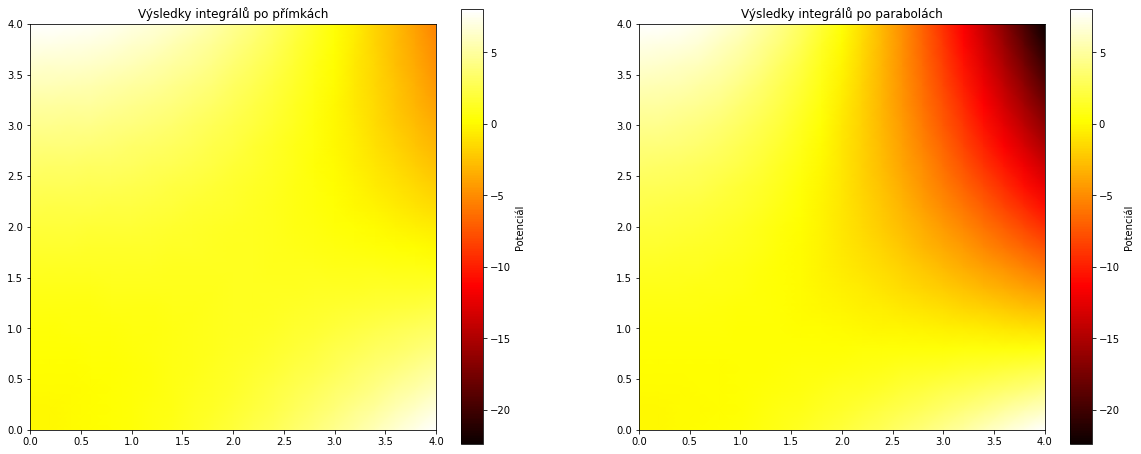

In [29]:
fig, axes = plt.subplots(1,2, figsize=(20,8))  # inicializace grafiky

Zmin = numpy.amin([PotencialPrimka, PotencialParabola])   # Výpočet minima pro stejnou brevnou škálu.
Zmax = numpy.amax([PotencialPrimka, PotencialParabola])   # Výpočet maxima pro stejnou brevnou škálu.

ax = axes[0]                                   # začneme kreslit do prvního grafu
output = ax.pcolormesh(X, Y, PotencialPrimka, cmap=cmap, shading='gouraud', vmin=Zmin, vmax=Zmax) # vykresleni barevne mapy pomocí zvolené barevné mapy a vyhlazování přechodů
plt.colorbar(output, ax=ax, label="Potenciál") # barevný sloupec s hodnotami vedle grafu
ax.set_aspect(1)                               # stejné měřítko na osách, aby se kružnice nedeformovaly
ax.set_title("Výsledky integrálů po přímkách")

ax = axes[1]                                   # začneme kreslit do prvního grafu
output = ax.pcolormesh(X, Y, PotencialParabola, cmap=cmap, shading='gouraud', vmin=Zmin, vmax=Zmax) # vykresleni barevne mapy pomocí zvolené barevné mapy a vyhlazování přechodů
plt.colorbar(output, ax=ax, label="Potenciál") # barevný sloupec s hodnotami vedle grafu
ax.set_aspect(1)                               # stejné měřítko na osách, aby se kružnice nedeformovaly
ax.set_title("Výsledky integrálů po parabolách")
None

Grafická kontrola je dostatečně průkazná, v pravém horním rohu je situace silně odlišná. Můžeme vypočítat i maximum rozdílu mezi funkčními hodnotami. Je srovnatelné s funkčními hodnotami, tedy nemůže být připsáno na vrub diskretizaci. 

In [30]:
numpy.amax(abs(PotencialPrimka-PotencialParabola))   # maximální hodnota, o kterou se liší výpočet integrálů po různých cestách

17.066713114092696

In [32]:
numpy.average(abs(PotencialPrimka-PotencialParabola)) # průměrná hodnota, o kterou se liší výpočet integrálů po různých cestách

2.9155578523049726

## Jak rozlišit potenciálové a nepotenciálové pole

Jako robustnější kriterium než porovnávat obrázky je možné například testovat integrály po uzavřených křivkách. Pokud vychází nulové, je vektorové pole potenciálové a je možné v něm zavést skalární potenciál a přejít k popisu pole pomocí tohoto skalárního potenciálu. V naprosté většině případů se to vyplatí, protože se skalárními funkcemi se pracuje lépe než s funkcemi vektorovými. Pokud integrály po uzavřených křivkách vychází výrazně nenulové (tak, že případná nenulovost nemůže být způsobena jenom zaokrouhlováním při diskretizaci spojité veličiny), je to signál toho, že skalární popis pomocí potenciálu není možno zavést.

## Závěr

Hledali jsme pomocí křivkového integrálu skalární potenciál vektorového pole. Jednou z toho v případě předem odsouzeném pro nezdar, kdy skalární potenciál neexistuje. Zvolili jsme pro jednoduchost grafické porovnání, protože zřetelně ilustruje rozdíl. 